m =  12.45619886868258
F =  -0.03175728417509802


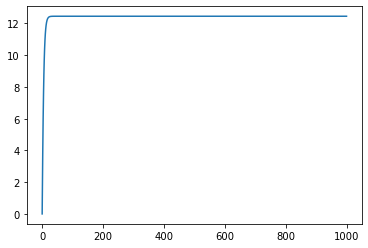

In [1]:
#
# TD 1 "Sciences du Climat" - Question 2
#
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#
# les paramètres
#
Smoy = 35.0
mu = 6
delta = 8
tau = 10
V = 300
T1r = 5
T2r = 20
S1r = 34.3

#
# le système d'équations différentielles
#
def f(t,y):
# on renomme les variables pronostiques et on en déduit les variables diagnostiques
    T1 = y[0]
    T2 = y[1]
    S1 = y[2]
#############  à compléter   #########
    S2 = 2*Smoy - S1
    m  = mu*((T2-T1)-delta*(S2-S1))
    
# et les équations d'évolution
    dT1dt = (T1r-T1)/tau + (abs(m)/V)*(T2-T1)
    dT2dt = (T2r-T2)/tau + (abs(m)/V)*(T1-T2)
    dS1dt = (S1r-S1)/tau + (abs(m)/V)*(S2-S1)
#######################################
    return [dT1dt, dT2dt, dS1dt]

#
# la condition initiale: 10°C, 10°C et 35‰
#
y0 = [10,10,35]
tfinal = 1000

#
# on intègre l'équation différentielle y' = f(y,t)
#
sol = solve_ivp(f, [0, tfinal], y0, rtol = 1e-7)

#
# on s'intéresse à la valeur finale (supposée être "l'équilibre")
#
yfinal = sol.y[:,-1]
T1final = yfinal[0]
T2final = yfinal[1]
S1final = yfinal[2]

#############  à compléter   #########
S2final = 2*Smoy - S1final
mfinal  = mu*((T2final-T1final)-delta*(S2final-S1final))
#######################################

print("m = ",mfinal)
print("F = ",(S1r - S1final)/tau)

#
# on peut aussi regarder l'évolution temporelle de la circulation m
#
def mfunc(y):
# on renomme les variables pronostiques et on en déduit les variables diagnostiques
    T1 = y[0]
    T2 = y[1]
    S1 = y[2]
    
#############  à compléter   #########
    S2 = 2*Smoy - S1
    m  = mu*((T2-T1)-delta*(S2-S1))
#######################################
    return m

ym = mfunc(sol.y)

plt.plot(sol.t,ym)
plt.show()

35 & -0.032 :  -6.683868520475521
35 & -0.031 :  15.435925374714262
34 & -0.031 :  -6.42986046942103


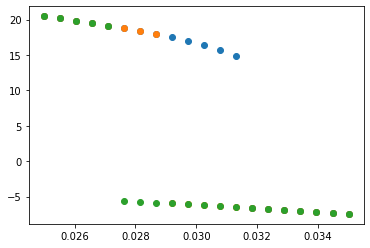

In [2]:
#
# TD 1 "Sciences du Climat" - Question 3
# pour ce 2nd problème, on explore l'influence de F et de la condition initiale sur S1
#
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

#
# les paramètres
#
Smoy = 35.0
mu = 6
delta = 8
tau = 10
V = 300
T1r = 5
T2r = 20
S1r = 34.3

#
# le système d'équations différentielles, avec F en paramètre
#
def f2(t,y,F):
# on renomme les variables pronostiques et on en déduit les variables diagnostiques
    T1 = y[0]
    T2 = y[1]
    S1 = y[2]
    
#############  à compléter   #########
    S2 = 2*Smoy - S1
    m  = mu*((T2-T1)-delta*(S2-S1))
# et les équations d'évolution
    dT1dt = (T1r-T1)/tau + (abs(m)/V)*(T2-T1)
    dT2dt = (T2r-T2)/tau + (abs(m)/V)*(T1-T2)
    dS1dt = F + (abs(m)/V)*(S2-S1)
#######################################
    return [dT1dt, dT2dt, dS1dt]


#
# on s'intéresse à la circulation océanique m final en fonction de F et de la condition initiale sur S1
#
def mfinal2(S1i,F):
    tfinal = 1000
    sol2 = solve_ivp(lambda t, y: f2(t,y,F), [0, tfinal], [10,10,S1i], rtol = 1e-7)
    
    #plt.plot(sol2.t,mfunc(sol2.y))
    #plt.show()

    yfinal = sol2.y[:,-1]
    T1final = yfinal[0]
    T2final = yfinal[1]
    S1final = yfinal[2]
    
#############  à compléter   #########
    S2final = 2*Smoy - S1final
    mfinal  = mu*((T2final-T1final)-delta*(S2final-S1final))
#######################################
    return mfinal

#
# ... quelques valeurs de m final en fonction de S1_initial et de F
#
print("35 & -0.032 : ",mfinal2(35,-0.032))
print("35 & -0.031 : ",mfinal2(35,-0.031))
print("34 & -0.031 : ",mfinal2(34,-0.031))


#
# de façon un peu plus systématique, plot la fonction m(F) pour quelques valeus de S1_initial 
#
nrun = 20
xf = np.linspace(0.025,0.035,nrun)   # les valeurs de -F
xm350 = np.array([mfinal2(35,-f) for f in xf])
xm345 = np.array([mfinal2(34.5,-f) for f in xf])
xm340 = np.array([mfinal2(34,-f) for f in xf])

plt.scatter(xf,xm350)
#plt.show()
plt.scatter(xf,xm345)
#plt.show()
plt.scatter(xf,xm340)
plt.show()

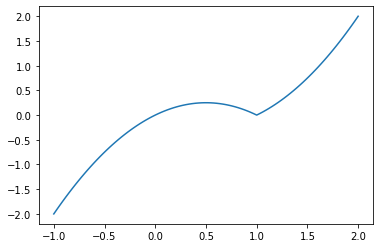

In [4]:
def G(x):
    return x*np.abs(1-x)

x=np.linspace(-1,2,100)
plt.plot(x,G(x))
plt.show()